<a href="https://colab.research.google.com/github/nandadesu/PCVK_Genap_2021/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


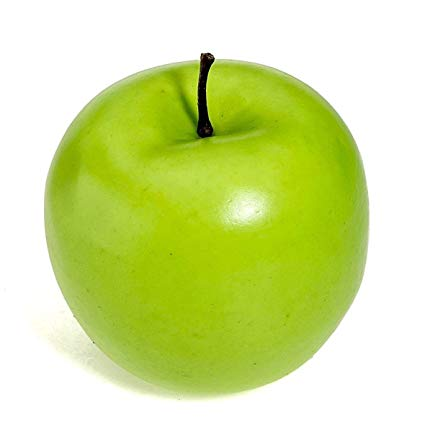

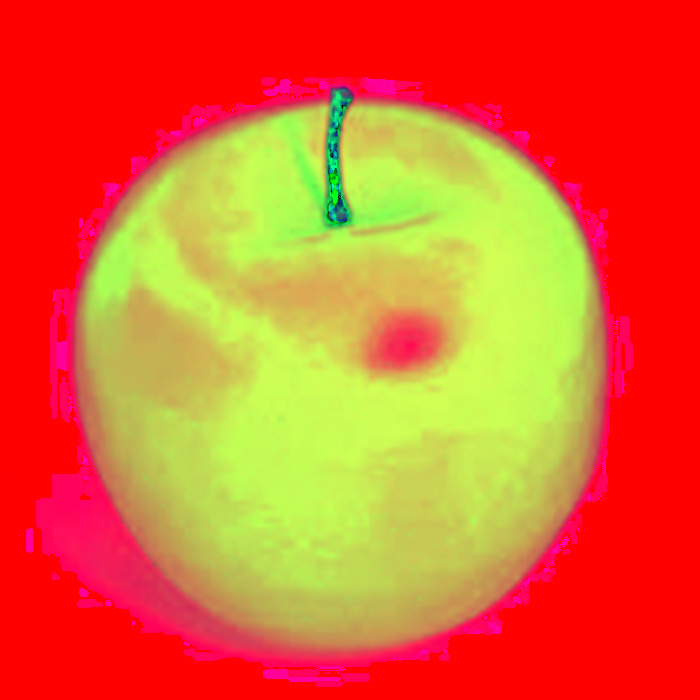

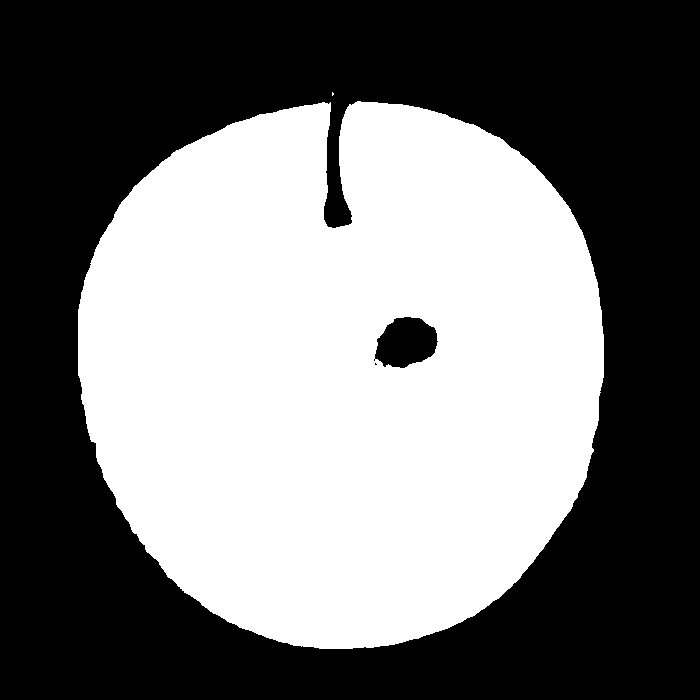

True

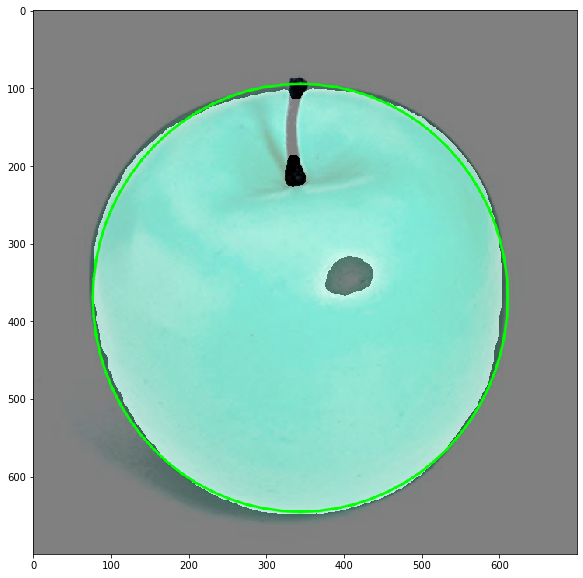

In [2]:
from __future__ import division
import cv2 as cv2
from matplotlib import pyplot as plt
from math import cos, sin
import numpy as np
from google.colab.patches import cv2_imshow


green = (0, 255, 0)

def show(image):
    plt.figure(figsize = [10, 10])
    plt.imshow(image, interpolation = 'nearest')
    
def overlay_mask(mask, image):
    # Make mask RGB
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    return img

def find_biggest_contour(image):
    # Make copy of image
    image = image.copy()
    
    contours, __ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key = lambda element : element[0])[1]
    
    # Return the biggest contour
    return biggest_contour
    
def circled_contour(image, contour):
    # Get bounding ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(contour)
    
    # Add it
    cv2.ellipse(image_with_ellipse, ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse

def detect_object(image):
    # Convert to RGB color scheme
    image = cv2.imread('/content/drive/MyDrive/Images/apple.jpg',cv2.COLOR_BGR2RGB)
    cv2_imshow(image)
    # Resize image
    max_dim = max(image.shape)
    scale = 700/max_dim
    image = cv2.resize(image, None, fx=scale, fy=scale)
    
    # Blur image
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    # Filters
    color_lower_bound = np.array([30, 150, 130])
    color_upper_bound = np.array([45, 256, 256])

    mask_color = cv2.inRange(image_blur_hsv, color_lower_bound, color_upper_bound)
     
    brightness_lower_bound = np.array([0, 100, 80])
    brightness_upper_bound = np.array([180, 256, 240])
    
    mask_brightness = cv2.inRange(image_blur_hsv, brightness_lower_bound, brightness_upper_bound)

    cv2_imshow(image_blur_hsv)

    # Combine masks
    mask = mask_color + mask_brightness
    cv2_imshow(mask)
    
    # Segment
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_opened = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
    
    # Find biggest apple
    big_apple_contour = find_biggest_contour(mask_opened)
    
    # Overlay
    overlay = overlay_mask(mask_opened, image)
    # Circle biggest
    circled = circled_contour(overlay, big_apple_contour)
    show(circled)
    
    
    # Convert color scheme back to RGB and return image
    image = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)
    return image


img = cv2.imread('apple.jpg')
after_img = detect_object(img)
cv2.imwrite('detect_apple.jpg', after_img)

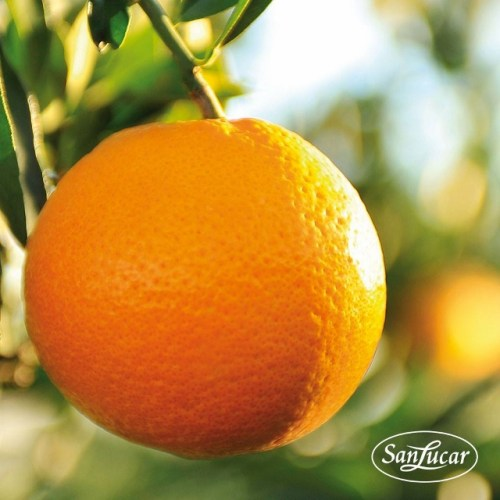

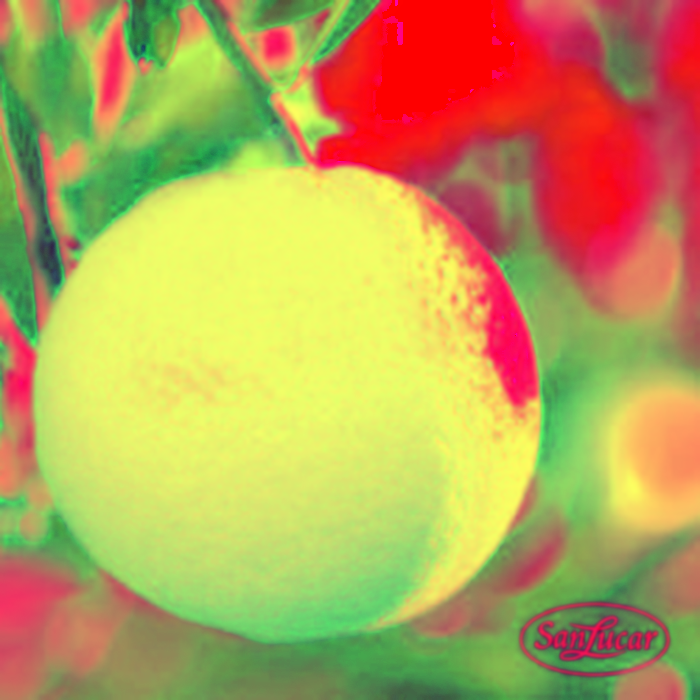

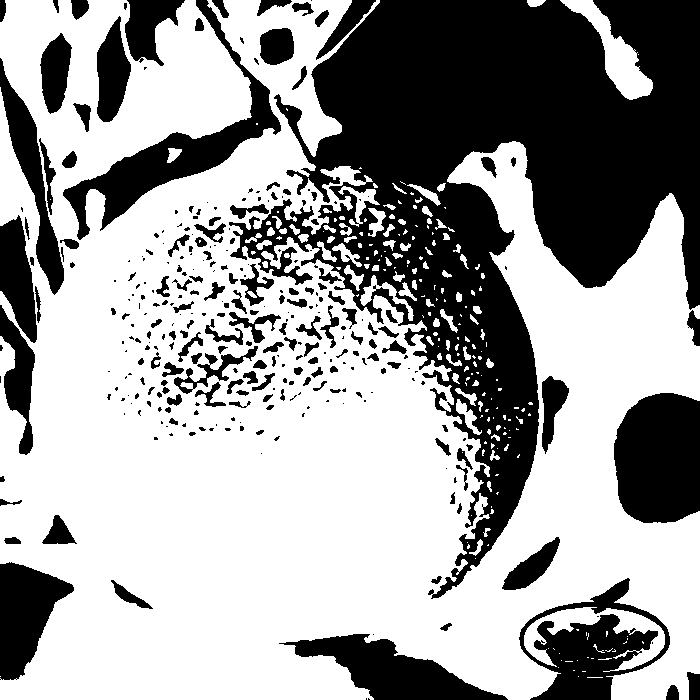

True

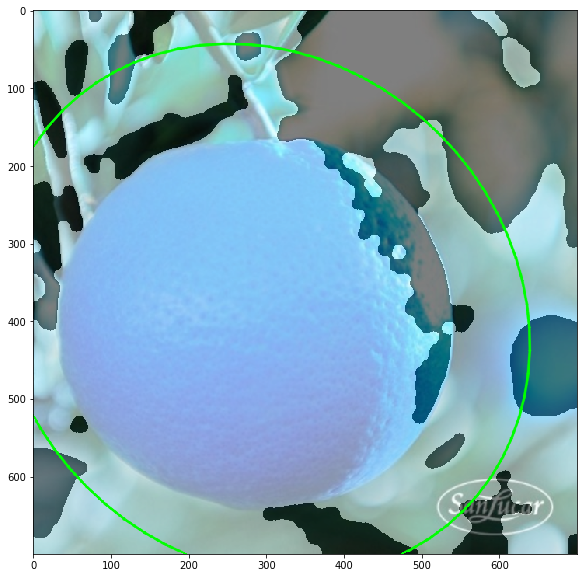

In [5]:
from __future__ import division
import cv2 as cv2
from matplotlib import pyplot as plt
from math import cos, sin
import numpy as np
from google.colab.patches import cv2_imshow


green = (0, 255, 0)

def show(image):
    plt.figure(figsize = [10, 10])
    plt.imshow(image, interpolation = 'nearest')
    
def overlay_mask(mask, image):
    # Make mask RGB
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    return img

def find_biggest_contour(image):
    # Make copy of image
    image = image.copy()
    
    contours, __ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key = lambda element : element[0])[1]
    
    # Return the biggest contour
    return biggest_contour
    
def circled_contour(image, contour):
    # Get bounding ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(contour)
    
    # Add it
    cv2.ellipse(image_with_ellipse, ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse

def detect_object(image):
    # Convert to RGB color scheme
    image = cv2.imread('/content/drive/MyDrive/Images/jeruk.jpg',cv2.COLOR_BGR2RGB)
    cv2_imshow(image)
    # Resize image
    max_dim = max(image.shape)
    scale = 700/max_dim
    image = cv2.resize(image, None, fx=scale, fy=scale)
    
    # Blur image
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    # Filters
    color_lower_bound = np.array([30, 150, 130])
    color_upper_bound = np.array([45, 256, 256])

    mask_color = cv2.inRange(image_blur_hsv, color_lower_bound, color_upper_bound)
     
    brightness_lower_bound = np.array([0, 100, 80])
    brightness_upper_bound = np.array([180, 256, 240])
    
    mask_brightness = cv2.inRange(image_blur_hsv, brightness_lower_bound, brightness_upper_bound)

    cv2_imshow(image_blur_hsv)

    # Combine masks
    mask = mask_color + mask_brightness
    cv2_imshow(mask)
    
    # Segment
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_opened = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
    
    # Find biggest apple
    big_apple_contour = find_biggest_contour(mask_opened)
    
    # Overlay
    overlay = overlay_mask(mask_opened, image)
    # Circle biggest
    circled = circled_contour(overlay, big_apple_contour)
    show(circled)
    
    
    # Convert color scheme back to RGB and return image
    image = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)
    return image


img = cv2.imread('jeruk.jpg')
after_img = detect_object(img)
cv2.imwrite('detect_jeruk.jpg', after_img)